In [1]:
%matplotlib inline

Cell-segmentation for fluorescence images
=========================================

This example shows how to use the high resolution tissue images to
segment nuclei.

This information can be used to compute additional image features like
cell count and cell size per spot (see
`examples_image_compute_segmentation_features`). This
example shows how to use `squidpy.im.segment` and explains the
parameters you can use.

We provide a built-in segmentation model
`squidpy.im.SegmentationWatershed`. In addition, you can use a custom
segmentation function, like a pre-trained `tensorflow.keras` model, to
perform the segmentation utilizing `squidpy.im.SegmentationCustom`.

Note that when using the provided segmentation model
[\'watershed\']{.title-ref}, the quality of the cell-segmentation
depends on the quality of your tissue images. In this example we use the
DAPI stain of a fluorescence dataset to compute the segmentation. For
harder cases, you may want to provide your own pre-trained segmentation
model.

:::{seealso}
-   `examples_image_compute_segment_hne` for an example
    on how to calculate a cell-segmentation of an H&E stain.
-   [Nuclei Segmentation using
    Cellpose](../../tutorials/tutorial_cellpose_segmentation.ipynb) for
    a tutorial on using Cellpose as a custom segmentation function.
-   [Nuclei Segmentation using
    StarDist](../../tutorials/tutorial_stardist.ipynb) for a tutorial on
    using StarDist as a custom segmentation function.
    
:::


In [3]:
import numpy as np

import matplotlib.pyplot as plt

import squidpy as sq

# load fluorescence tissue image
img = sq.datasets.visium_fluo_image_crop()

We crop the image to a smaller segment. This is only to speed things up,
`squidpy.im.segment` can also process very large images (see
`examples_image_compute_process_hires`).


In [4]:
crop = img.crop_corner(1000, 1000, size=1000)

The tissue image in this dataset contains four fluorescence stains. The
first one is DAPI, which we will use for the nuclei-segmentation.


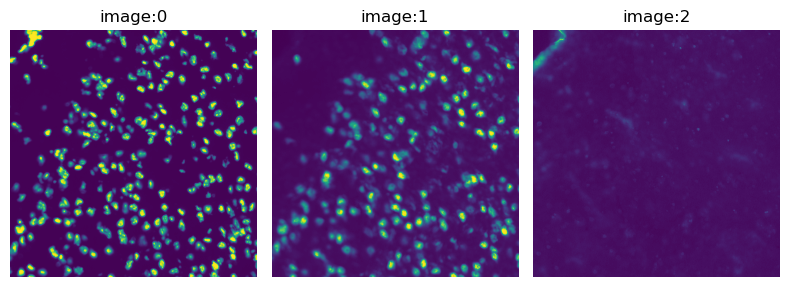

In [5]:
crop.show("image", channelwise=True)

We segment the image with `squidpy.im.segment` using watershed
segmentation (`method = 'watershed'`). With the arguments `layer` and
`channel` we define the image layer and channel of the image that should
be segmented.

With `kwargs` we can provide keyword arguments to the segmentation
model. For watershed segmentation, we need to set a threshold to create
the mask image. You can either set a manual threshold, or use automated
[Otsu thresholding](https://en.wikipedia.org/wiki/Otsu%27s_method). For
this fluorescence image example, Otsu\'s thresh works very well, thus we
will use `thresh = None`. See
`examples_image_compute_segment_hne` for an example
where we use a manually defined threshold.

In addition, we can specify if the values greater or equal than the
threshold should be in the mask (default) or if the values smaller to
the threshold should be in the mask (`geq = False`).


In [6]:
sq.im.segment(
    img=crop, layer="image", channel=0, method="watershed", thresh=None, geq=True
)

The segmented crop is saved in the layer `segmented_watershed`. This
behavior can be changed with the arguments `copy` and `layer_added`. The
result of the segmentation is a label image that can be used to extract
features like the number of cells from the image.


ImageContainer[shape=(1000, 1000), layers=['image', 'segmented_watershed']]
Number of segments in crop: 580


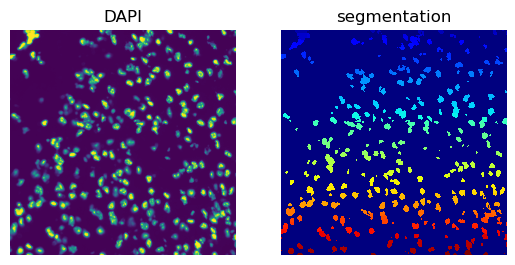

In [7]:
print(crop)
print(f"Number of segments in crop: {len(np.unique(crop['segmented_watershed']))}")

fig, axes = plt.subplots(1, 2)
crop.show("image", channel=0, ax=axes[0])
_ = axes[0].set_title("DAPI")
crop.show("segmented_watershed", cmap="jet", interpolation="none", ax=axes[1])
_ = axes[1].set_title("segmentation")